<a href="https://colab.research.google.com/github/Sunny1729-prog/Data-Science-and-Machine-Learning/blob/main/%24_Assignment_6(DS%26ML)(Name%3DSunny_Kumar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

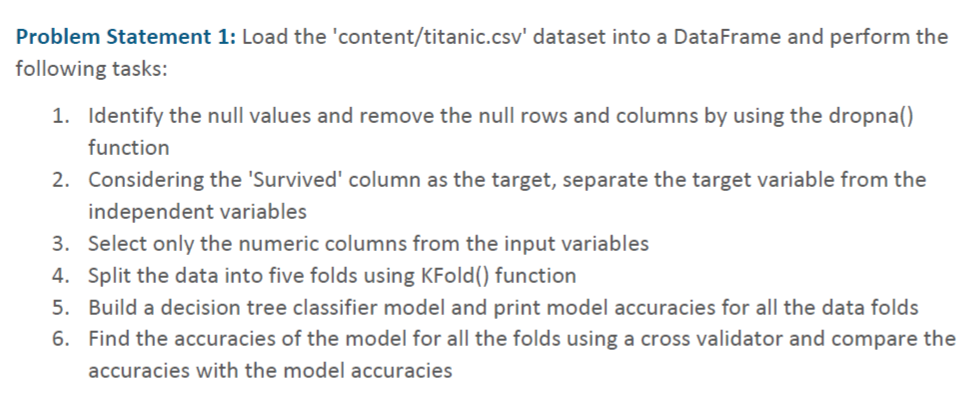

In [2]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns=["Cabin","Embarked"],inplace=True)
df["Age"].fillna(value=df["Age"].mean(),inplace=True)

In [7]:
#df[df['Embarked'].isnull()].index.tolist()

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [9]:
df=df.select_dtypes(include=['int64'])

In [10]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=34)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()

In [13]:
#checking score using cross validator
result = cross_val_score(tree , X, y, cv = kf)
result

array([0.59217877, 0.61797753, 0.62359551, 0.6011236 , 0.64606742])

In [14]:
from sklearn.metrics import accuracy_score
acc_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test = y[train_index],y[test_index]
     
    tree.fit(X_train,y_train)
    pred = tree.predict(X_test)
     
    acc = accuracy_score(y_test,pred)
    acc_score.append(acc)

In [15]:
acc_score

[0.5921787709497207,
 0.6179775280898876,
 0.6123595505617978,
 0.6067415730337079,
 0.6348314606741573]

In [16]:
fold_no=["1st_fold","2nd_fold","3rd_fold","4th_fold","5th_fold",]
df_result=pd.DataFrame(list(zip(fold_no,result,acc_score)),columns=["Fold","cross_validator_accuracy","model_Accuracy"])

In [17]:
df_result

,Fold,cross_validator_accuracy,model_Accuracy
0,1st_fold,0.592179,0.592179
1,2nd_fold,0.617978,0.617978
2,3rd_fold,0.623596,0.612360
3,4th_fold,0.601124,0.606742
4,5th_fold,0.646067,0.634831


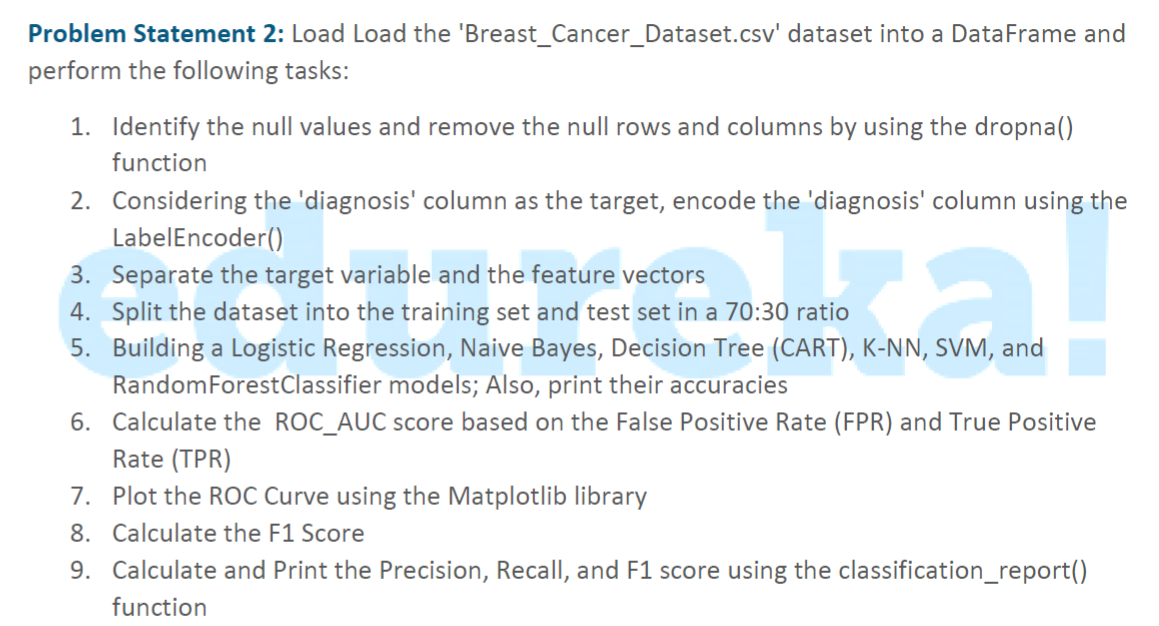

In [63]:
df=pd.read_csv("/content/Breast_Cancer_Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
df.shape

(569, 33)

In [65]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [66]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [67]:
df.drop(columns=["Unnamed: 32"],inplace=True)

In [68]:
df.isnull().sum().sum()

0

In [69]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [70]:
df["diagnosis"]=labelencoder.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [71]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=35)

In [73]:
X.shape,X_train.shape,X_test.shape

((569, 31), (398, 31), (171, 31))

In [74]:
y.shape,y_train.shape,y_test.shape

((569,), (398,), (171,))

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_transform = ss.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,random_state=54,test_size=0.3)

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report, f1_score

In [77]:
log = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
nb = GaussianNB()
svc = SVC()

In [78]:
models=[log,tree,rf,knn,nb,svc]

In [79]:
for model in models :
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy for",model,"is : ",accuracy_score(y_test,y_pred))

Accuracy for LogisticRegression() is :  0.9824561403508771
Accuracy for DecisionTreeClassifier() is :  0.9415204678362573
Accuracy for RandomForestClassifier() is :  0.9649122807017544
Accuracy for KNeighborsClassifier() is :  0.9766081871345029
Accuracy for GaussianNB() is :  0.935672514619883
Accuracy for SVC() is :  0.9824561403508771


In [80]:
tree.fit(X_train,y_train)
y_pred=tree.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [81]:
roc_auc_score(y_test,y_pred)

0.9345064252336448

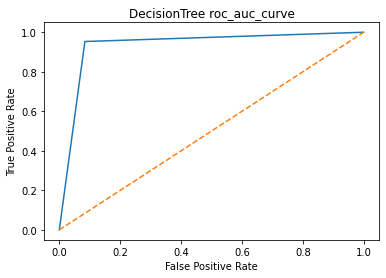

In [82]:
plt.title('DecisionTree roc_auc_curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
f1_score(y_test, y_pred, average='macro')

0.926377726750861

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       107
           1       0.87      0.95      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



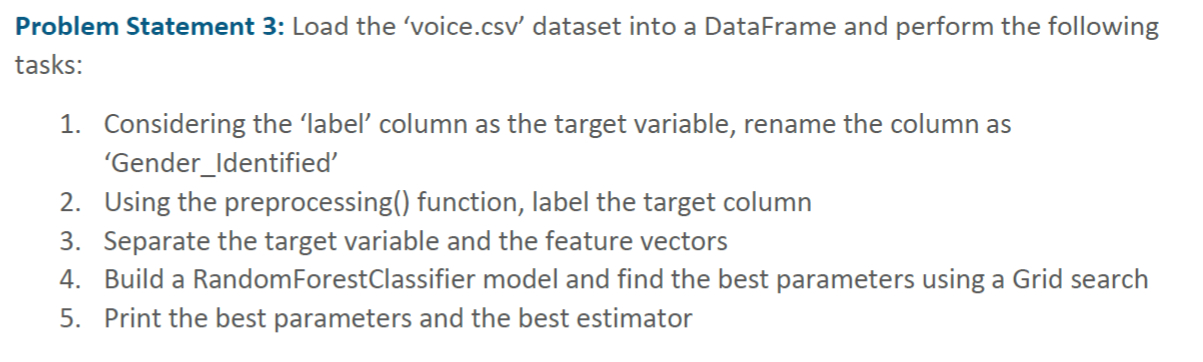

In [104]:
df=pd.read_csv("/content/voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [105]:
df.shape

(3168, 21)

In [106]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [107]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [111]:
df["Gender_Identified"]=df["label"]
df.drop(columns=["label"],inplace=True)

In [112]:
X=df.drop(columns=["Gender_Identified"])
y=df["Gender_Identified"]

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=35)

In [120]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)

In [121]:
X_train = scaler.transform(X_train)
X_test = scaler2.transform(X_test)

In [122]:
rf = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9800210304942166

In [123]:
params={'n_estimators' : [50,100,150,200], 
        'criterion' : ["gini", "entropy"],
        'max_features': ['auto', 'sqrt', 'log2'],  
        'max_depth' : range(2,10)
        }

In [126]:
from sklearn.model_selection import GridSearchCV
gridCV = GridSearchCV(estimator=rf,
                    param_grid=params,
                    scoring='accuracy',
                    cv=4)

In [127]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [128]:
gridCV.best_score_

0.9797045240186034

In [129]:
gridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 150}

In [130]:
gridCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=150)

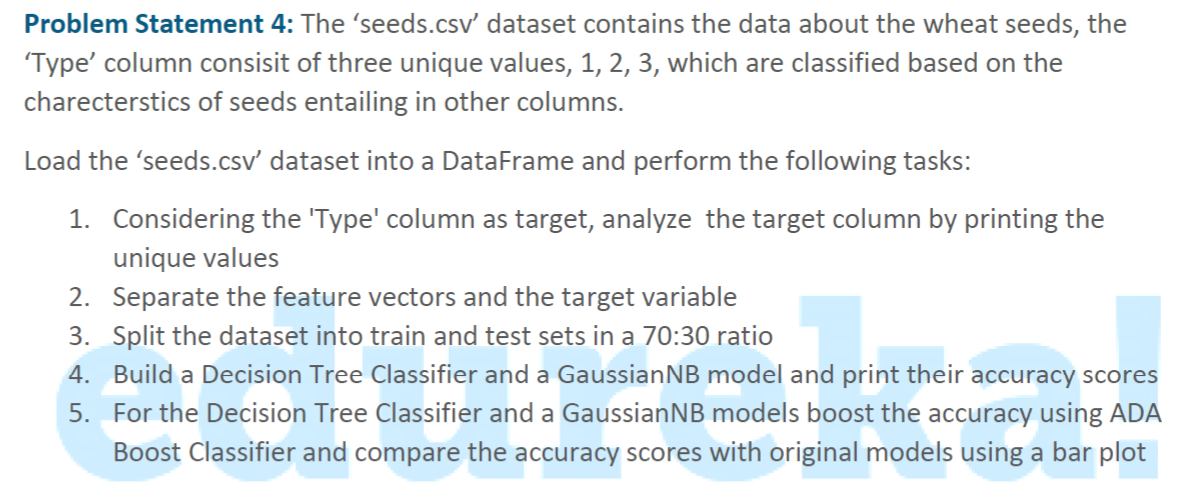

In [196]:
df=pd.read_csv("/content/seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [197]:
df.shape

(199, 8)

In [198]:
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [199]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [200]:
df["Type"].unique()

array([1, 2, 3])

In [201]:
df["Type"].value_counts(normalize=True)

2    0.341709
1    0.331658
3    0.326633
Name: Type, dtype: float64

In [202]:
X=df.drop(columns=["Type"])
y=df["Type"]

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=35)

In [204]:
X.shape,X_train.shape,X_test.shape

((199, 7), (139, 7), (60, 7))

In [205]:
y.shape,y_train.shape,y_test.shape

((199,), (139,), (60,))

In [211]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
tree_score=accuracy_score(y_test,y_pred)
tree_score

0.9166666666666666

In [212]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
nb_score=accuracy_score(y_test,y_pred)
nb_score

0.9

In [213]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, base_estimator=tree, learning_rate=0.9)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
tree_score_boosted=accuracy_score(y_test,pred)
tree_score_boosted

0.8833333333333333

In [214]:
ada = AdaBoostClassifier(n_estimators=100, base_estimator=nb, learning_rate=0.9)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
nb_score_boosted=accuracy_score(y_test,pred)
nb_score_boosted

0.95

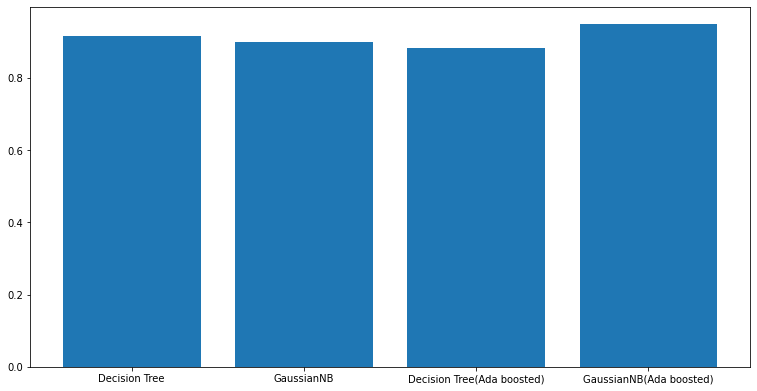

In [218]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
models = ["Decision Tree", "GaussianNB", "Decision Tree(Ada boosted)", "GaussianNB(Ada boosted)"]
score = [tree_score,nb_score,tree_score_boosted,nb_score_boosted]
ax.bar(models,score)
plt.show()